###1. Importing libraries and dataset

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Exploring dataset and cleaning

In [4]:
#Pandas Dataframe
df = pd.read_csv('/content/drive/MyDrive/exams.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [7]:
(1000, 8)

(1000, 8)

their are 1000 rows and 8 columns are present

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


by using .info() function we get to know the datatype of our dataset.
In our dataset, gender,race/ethnicity,parental level of education,lunch and test preparation cource contains the categorical data
math score, reading score and writing score contains numerical data

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


By .describe() function we get to know the count,mean,std,min,25%,50% ,75% and the max values of our dataset

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [14]:
df['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [15]:
df['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [16]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [17]:
df['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [18]:
df['math score'].unique()

array([ 67,  40,  59,  77,  78,  63,  62,  93,  47,  99,  80,  74,  81,
        69,  58,  54,  23,  39,  83,  71,  44,  46,  51,  53,  33,  87,
        65,  79,  68,  57,  98, 100,  60,  64,  52,  36,  56,  88,  42,
        76,  49,  72,  31,  32,  97,  94,  95,  45,  75,  66,  70,  82,
        92,  30,  41,  43,  55,  73,  48,  86,  84,  50,  89,  91,  85,
        61,  35,  90,  96,  13,  38,  28,  26,  37,  29,  34,  25])

In [19]:
df['reading score'].unique()

array([ 67,  59,  60,  78,  73,  77,  88,  56,  42,  83,  87,  74,  61,
        47,  62,  44,  32,  76,  52,  69,  55,  38,  45,  68,  89,  54,
        79,  41,  65,  81,  75,  70,  46,  63,  72,  58,  53,  57,  80,
        51,  66,  82,  93,  64,  91,  43,  71, 100,  50,  33,  34,  90,
        84,  95,  98,  92,  85,  49,  86,  48,  94,  36,  28,  39,  29,
        96,  97,  40,  27,  37,  99,  31,  35])

In [20]:
df['writing score'].unique()

array([ 63,  55,  50,  68,  76,  84,  65,  45,  85,  90,  73,  57,  42,
        44,  31,  88,  54,  32,  56,  60,  89,  51,  77,  39,  71,  74,
        75,  72,  64,  82,  70,  87,  78,  49,  47,  62,  83,  48,  59,
        97,  81,  67,  69,  61,  93, 100,  53,  79,  58,  33,  86,  66,
        46,  80,  91,  92,  95,  99,  96,  28,  52,  24,  40,  43,  94,
        23,  38,  30,  35,  41,  98,  36,  27,  26,  34,  37])

### Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


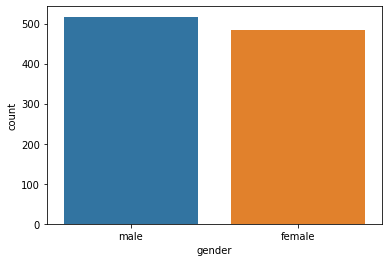

In [21]:
sns.countplot(df['gender'])

From the graph we observe that more than 500 male students have given the exam
male students are greater than female students

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


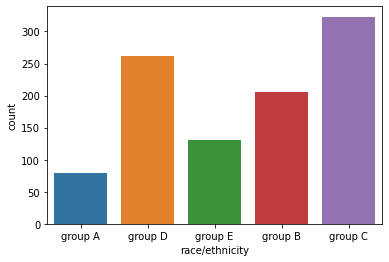

In [22]:
sns.countplot(df['race/ethnicity'])

From the graph we observe that group c having more number of people which is more than 300 ,then followed by group D and so on
group A having small number of people

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


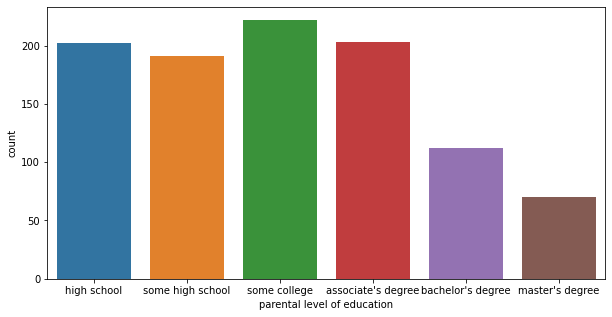

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df['parental level of education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


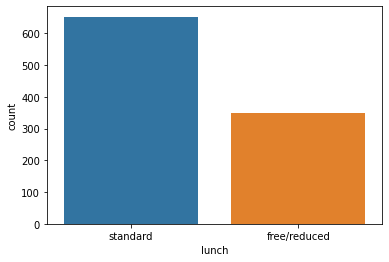

In [24]:
sns.countplot(df['lunch'])

More than 600 students have taken the standard lunch.
and their are more than 300 students who has taken free/reduced lunch.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


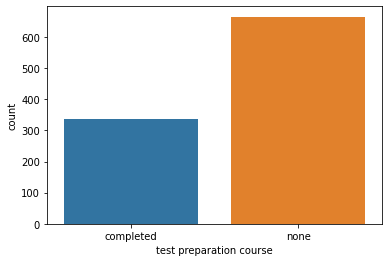

In [25]:
sns.countplot(df['test preparation course'])

Their are very less students who has completed their test cource preparation which is more than 300.
and many students who has not completed their cource

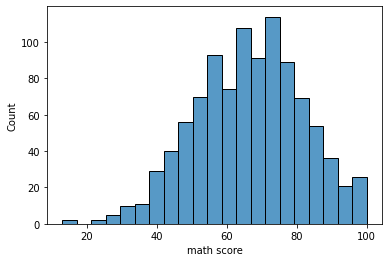

In [26]:
sns.histplot(df['math score'])

From the graph we observe that many students having their math score in between 60 to 80

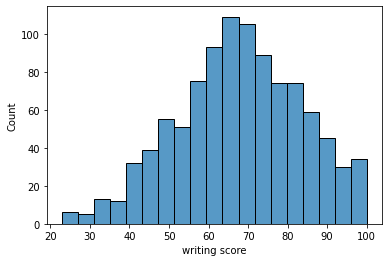

In [27]:
sns.histplot(df['writing score'])

In [28]:
marks_relation=df.corr()
marks_relation

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


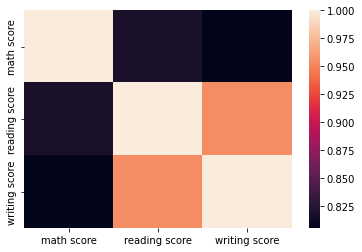

In [29]:
sns.heatmap(marks_relation)

From the graph we observe the correlation of columns with each other.
the correlation of columns with itself is 1.
positive correlation is the good correlation
every column is having the good correlation with each other

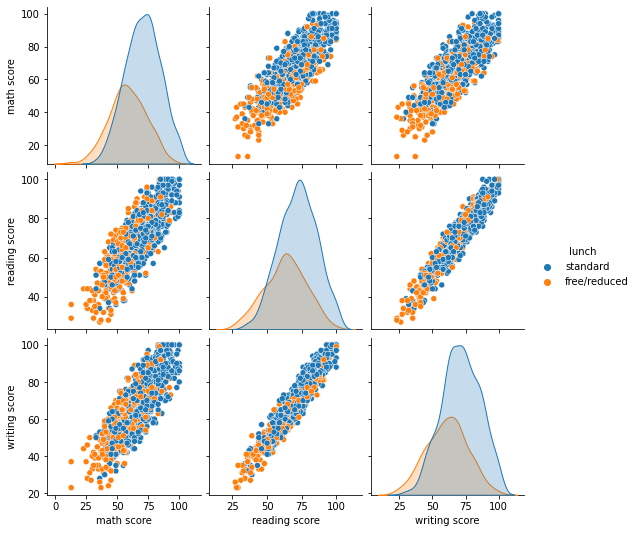

In [30]:
sns.pairplot(df,hue='lunch')